In [1]:
import sys
# Code directory path
new_path = r'/home/users/suihong/1-Unconditional_Upload/'
sys.path.append(new_path)

In [3]:
import pickle
import numpy as np
import tensorflow as tf
import PIL.Image
%matplotlib inline
import matplotlib.pyplot as plt

# Initialize TensorFlow session.
tf.InteractiveSession()

# pre-trained generator directory path.
network_dir = '/scratch/users/suihong/ProGAN_MultiChannel_Reusults_ConditionedtoMultiConditions_TF/Unconditional_prog/'

# replace with pre-trained generator name.
with open(network_dir + 'network-snapshot-011520.pkl', 'rb') as file:
    G, D, Gs = pickle.load(file)


#### Randomly sample and plot facies models from trained generator

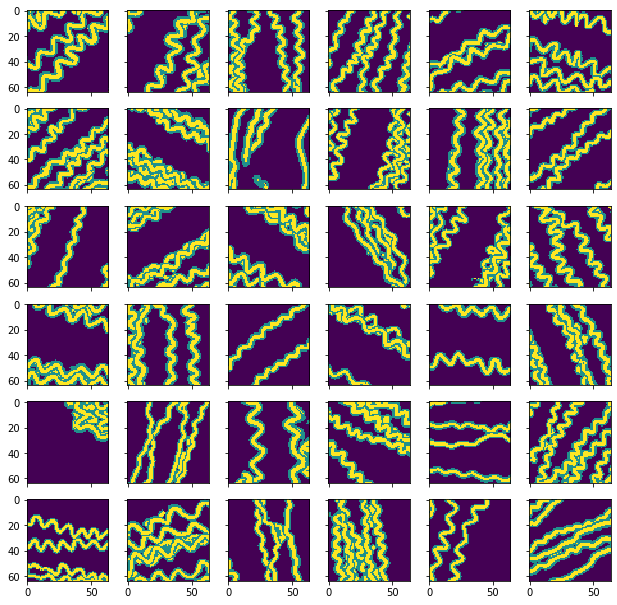

In [3]:

fig, ax = plt.subplots(6, 6, sharex='col', sharey='row')
fig.set_size_inches(10.5, 10.5, forward=True)

# Generate random latent vectors.
latents_plt = np.random.RandomState(63).randn(6 * 6, Gs.input_shapes[0][1]) # 1000 random latents *Gs.input_shapes = [None, 128] [None, 4] [None, 1, 64, 64]
labels_plt = np.zeros([6 * 6] + Gs.input_shapes[1][1:]) #np.repeat(labels_plt, 5 * 6, axis=0)

# Run the generator to produce a set of facies models.
images_plt = Gs.run(latents_plt, labels_plt)
images_plt = np.where(images_plt< -0.3, -1, images_plt)
images_plt = np.where(images_plt> 0.3, 1, images_plt)
images_plt = np.where((images_plt> -0.4) & (images_plt< 0.4), 0, images_plt)

for i in range (6):
  for j in range(6):
    ax[i, j].imshow(images_plt[i*6 + j,0,:,:], vmin = -1, vmax = 1)


#### Randomly sample facies models from training data

In [4]:
import dataset
import config
training_set = dataset.load_dataset(data_dir=config.data_dir, verbose=True, **config.dataset)

Streaming data using dataset.TFRecordDataset...
Dataset shape = [1, 64, 64]
Dynamic range = [0, 255]
Label size    = 0


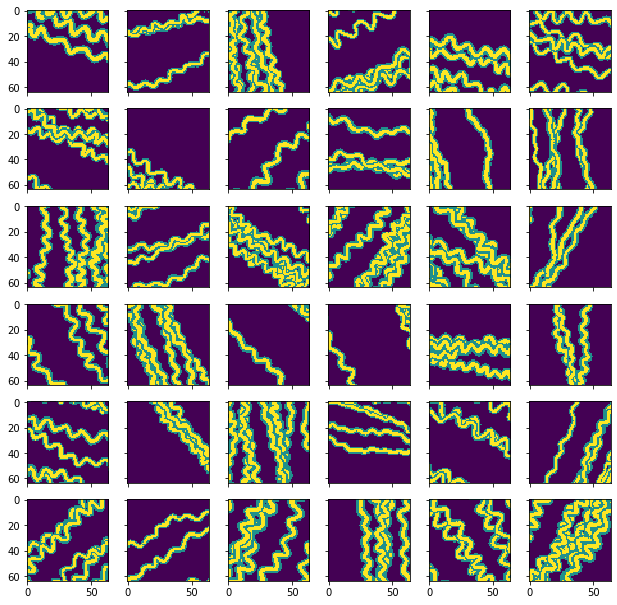

In [4]:
fm_no = 6*6
reals, _ = training_set.get_minibatch_np(fm_no) 

fig, ax = plt.subplots(6, 6, sharex='col', sharey='row')
fig.set_size_inches(10.5, 10.5, forward=True)

for i in range (6):
  for j in range(6):
    ax[i, j].imshow(reals[i*6 + j,0,:,:])
